In [2]:
import pandas as pd

df = pd.read_csv('/content/Food_Delivery_Times.csv')
df.head(10)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
5,679,19.40,Clear,Low,Evening,Scooter,8,9.0,57
6,627,9.52,Clear,Low,NaN,Bike,12,1.0,49
7,514,17.39,Clear,Medium,Evening,Scooter,5,6.0,46
8,860,1.78,Snowy,Low,Evening,Car,20,6.0,35
9,137,10.62,Foggy,Low,Evening,Scooter,29,1.0,73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [4]:
df['Actual_Delivery_Time'] = df['Delivery_Time_min'] - df['Preparation_Time_min']

In [5]:
df=df.drop(['Order_ID'], axis=1)
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Actual_Delivery_Time
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,31
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84,64
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59,31
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,32
4,19.03,Clear,Low,Morning,Bike,16,5.0,68,52


In [6]:
df.loc[df['Vehicle_Type'] == 'Car', 'Vehicle_Type'] = 'Pickup Truck'
df['Vehicle_Type'].unique()

array(['Scooter', 'Bike', 'Pickup Truck'], dtype=object)

In [7]:
df.isnull().sum()

,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0
Actual_Delivery_Time,0


In [8]:
df['Weather'].value_counts()

,count
Weather,
Clear,470
Rainy,204
Foggy,103
Snowy,97
Windy,96


In [9]:
df['Traffic_Level'].value_counts()

,count
Traffic_Level,
Medium,390
Low,383
High,197


In [10]:
df['Time_of_Day'].value_counts()

,count
Time_of_Day,
Morning,308
Evening,293
Afternoon,284
Night,85


In [11]:
df[df['Weather'].isnull()]

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Actual_Delivery_Time
42,0.99,NaN,Medium,Evening,Bike,15,NaN,32,17
71,4.17,NaN,Low,Evening,Scooter,5,1.0,22,17
153,2.78,NaN,High,Afternoon,Scooter,9,0.0,41,32
167,4.15,NaN,Medium,Morning,Pickup Truck,17,8.0,46,29
168,16.80,NaN,High,Morning,Pickup Truck,19,4.0,85,66
203,1.06,NaN,Low,Afternoon,Scooter,19,6.0,21,2
225,14.77,NaN,High,Morning,Scooter,11,6.0,67,56
230,8.27,NaN,High,Afternoon,Scooter,13,5.0,58,45
257,6.24,NaN,Medium,Evening,Bike,15,3.0,52,37
281,11.52,NaN,Medium,Morning,Scooter,25,2.0,58,33


In [12]:
df.isnull().sum()


,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0
Actual_Delivery_Time,0


In [13]:
from sklearn.model_selection import train_test_split

X=df.drop(['Actual_Delivery_Time', 'Preparation_Time_min', 'Delivery_Time_min'], axis=1)
y=df['Actual_Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )


In [14]:
X_train[X_train['Traffic_Level'].isnull()]

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Courier_Experience_yrs
867,7.59,Clear,NaN,Afternoon,Scooter,3.0
679,13.44,Clear,NaN,Evening,Scooter,5.0
537,14.72,Clear,NaN,Evening,Scooter,8.0
758,19.74,Clear,NaN,Afternoon,Pickup Truck,1.0
85,10.65,Clear,NaN,Afternoon,Scooter,8.0
376,19.40,Snowy,NaN,Afternoon,Scooter,9.0
420,8.92,Windy,NaN,Morning,Bike,4.0
731,9.24,Windy,NaN,Afternoon,Bike,2.0
737,10.46,Clear,NaN,Evening,Bike,3.0
527,18.02,Clear,NaN,Evening,Pickup Truck,3.0


In [15]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(drop='first', sparse_output=False)

# fit on train
X_train_encoded = encoder.fit_transform(X_train[['Vehicle_Type']])
X_test_encoded = encoder.transform(X_test[['Vehicle_Type']])

# wrap into DataFrame
train_encoded_df = pd.DataFrame(X_train_encoded,
                                columns=encoder.get_feature_names_out(['Vehicle_Type']),
                                index=X_train.index)
test_encoded_df = pd.DataFrame(X_test_encoded,
                               columns=encoder.get_feature_names_out(['Vehicle_Type']),
                               index=X_test.index)

# drop old column and concat
X_train = pd.concat([X_train.drop(columns=['Vehicle_Type']), train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['Vehicle_Type']), test_encoded_df], axis=1)



In [16]:
X_train.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Courier_Experience_yrs,Vehicle_Type_Pickup Truck,Vehicle_Type_Scooter
259,3.54,Rainy,Medium,Evening,5.0,0.0,0.0
409,16.54,Rainy,Medium,Afternoon,7.0,0.0,0.0
637,8.67,Windy,High,Morning,4.0,0.0,0.0
353,19.74,NaN,Low,NaN,7.0,1.0,0.0
729,14.27,Clear,Medium,Night,3.0,1.0,0.0


In [17]:
X_train.isnull().sum()

,0
Distance_km,0
Weather,24
Traffic_Level,21
Time_of_Day,26
Courier_Experience_yrs,27
Vehicle_Type_Pickup Truck,0
Vehicle_Type_Scooter,0


In [18]:
df['Weather'].value_counts()

,count
Weather,
Clear,470
Rainy,204
Foggy,103
Snowy,97
Windy,96


In [19]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

encoder2 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# fit only on non-null values
non_null_train = X_train.loc[X_train['Weather'].notnull(), ['Weather']]
encoder2.fit(non_null_train)

# transform train
train_encoded = pd.DataFrame(
    encoder2.transform(non_null_train),
    columns=encoder2.get_feature_names_out(['Weather']),
    index=non_null_train.index
)

# transform test
non_null_test = X_test.loc[X_test['Weather'].notnull(), ['Weather']]
test_encoded = pd.DataFrame(
    encoder2.transform(non_null_test),
    columns=encoder2.get_feature_names_out(['Weather']),
    index=non_null_test.index
)

# replace only non-nulls with encoded columns
X_train = X_train.drop(columns=['Weather'])
X_test = X_test.drop(columns=['Weather'])

X_train = pd.concat([X_train, train_encoded.reindex(X_train.index)], axis=1)
X_test = pd.concat([X_test, test_encoded.reindex(X_test.index)], axis=1)


In [20]:
X_train.isnull().sum()

,0
Distance_km,0
Traffic_Level,21
Time_of_Day,26
Courier_Experience_yrs,27
Vehicle_Type_Pickup Truck,0
Vehicle_Type_Scooter,0
Weather_Foggy,24
Weather_Rainy,24
Weather_Snowy,24
Weather_Windy,24


In [21]:
X_train.head()

,Distance_km,Traffic_Level,Time_of_Day,Courier_Experience_yrs,Vehicle_Type_Pickup Truck,Vehicle_Type_Scooter,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
259,3.54,Medium,Evening,5.0,0.0,0.0,0.0,1.0,0.0,0.0
409,16.54,Medium,Afternoon,7.0,0.0,0.0,0.0,1.0,0.0,0.0
637,8.67,High,Morning,4.0,0.0,0.0,0.0,0.0,0.0,1.0
353,19.74,Low,NaN,7.0,1.0,0.0,NaN,NaN,NaN,NaN
729,14.27,Medium,Night,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df['Time_of_Day'].value_counts()

,count
Time_of_Day,
Morning,308
Evening,293
Afternoon,284
Night,85


In [23]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

encoder3 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# fit only on non-null values
non_null_train = X_train.loc[X_train['Time_of_Day'].notnull(), ['Time_of_Day']]
encoder3.fit(non_null_train)

# transform train
train_encoded = pd.DataFrame(
    encoder3.transform(non_null_train),
    columns=encoder3.get_feature_names_out(['Time_of_Day']),
    index=non_null_train.index
)

# transform test
non_null_test = X_test.loc[X_test['Time_of_Day'].notnull(), ['Time_of_Day']]
test_encoded = pd.DataFrame(
    encoder3.transform(non_null_test),
    columns=encoder3.get_feature_names_out(['Time_of_Day']),
    index=non_null_test.index
)

# replace only non-nulls with encoded columns
X_train = X_train.drop(columns=['Time_of_Day'])
X_test = X_test.drop(columns=['Time_of_Day'])

X_train = pd.concat([X_train, train_encoded.reindex(X_train.index)], axis=1)
X_test = pd.concat([X_test, test_encoded.reindex(X_test.index)], axis=1)


In [24]:
X_train.head()

,Distance_km,Traffic_Level,Courier_Experience_yrs,Vehicle_Type_Pickup Truck,Vehicle_Type_Scooter,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
259,3.54,Medium,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
409,16.54,Medium,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
637,8.67,High,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
353,19.74,Low,7.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,14.27,Medium,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
X_train.isnull().sum()

,0
Distance_km,0
Traffic_Level,21
Courier_Experience_yrs,27
Vehicle_Type_Pickup Truck,0
Vehicle_Type_Scooter,0
Weather_Foggy,24
Weather_Rainy,24
Weather_Snowy,24
Weather_Windy,24
Time_of_Day_Evening,26


In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

encoder4 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# fit only on non-null values
non_null_train = X_train.loc[X_train['Traffic_Level'].notnull(), ['Traffic_Level']]
encoder4.fit(non_null_train)

# transform train
train_encoded = pd.DataFrame(
    encoder4.transform(non_null_train),
    columns=encoder4.get_feature_names_out(['Traffic_Level']),
    index=non_null_train.index
)

# transform test
non_null_test = X_test.loc[X_test['Traffic_Level'].notnull(), ['Traffic_Level']]
test_encoded = pd.DataFrame(
    encoder4.transform(non_null_test),
    columns=encoder4.get_feature_names_out(['Traffic_Level']),
    index=non_null_test.index
)

# replace only non-nulls with encoded columns
X_train = X_train.drop(columns=['Traffic_Level'])
X_test = X_test.drop(columns=['Traffic_Level'])

X_train = pd.concat([X_train, train_encoded.reindex(X_train.index)], axis=1)
X_test = pd.concat([X_test, test_encoded.reindex(X_test.index)], axis=1)


In [27]:
X_train.head()

,Distance_km,Courier_Experience_yrs,Vehicle_Type_Pickup Truck,Vehicle_Type_Scooter,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Level_Low,Traffic_Level_Medium
259,3.54,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
409,16.54,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,8.67,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
353,19.74,7.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
729,14.27,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [28]:
X_train.isnull().sum()

,0
Distance_km,0
Courier_Experience_yrs,27
Vehicle_Type_Pickup Truck,0
Vehicle_Type_Scooter,0
Weather_Foggy,24
Weather_Rainy,24
Weather_Snowy,24
Weather_Windy,24
Time_of_Day_Evening,26
Time_of_Day_Morning,26


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 259 to 985
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Distance_km                800 non-null    float64
 1   Courier_Experience_yrs     773 non-null    float64
 2   Vehicle_Type_Pickup Truck  800 non-null    float64
 3   Vehicle_Type_Scooter       800 non-null    float64
 4   Weather_Foggy              776 non-null    float64
 5   Weather_Rainy              776 non-null    float64
 6   Weather_Snowy              776 non-null    float64
 7   Weather_Windy              776 non-null    float64
 8   Time_of_Day_Evening        774 non-null    float64
 9   Time_of_Day_Morning        774 non-null    float64
 10  Time_of_Day_Night          774 non-null    float64
 11  Traffic_Level_Low          779 non-null    float64
 12  Traffic_Level_Medium       779 non-null    float64
dtypes: float64(13)
memory usage: 87.5 KB


In [30]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=42)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)


X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [31]:
X_test_imputed.head().isnull().sum()

,0
Distance_km,0
Courier_Experience_yrs,0
Vehicle_Type_Pickup Truck,0
Vehicle_Type_Scooter,0
Weather_Foggy,0
Weather_Rainy,0
Weather_Snowy,0
Weather_Windy,0
Time_of_Day_Evening,0
Time_of_Day_Morning,0


<Axes: >

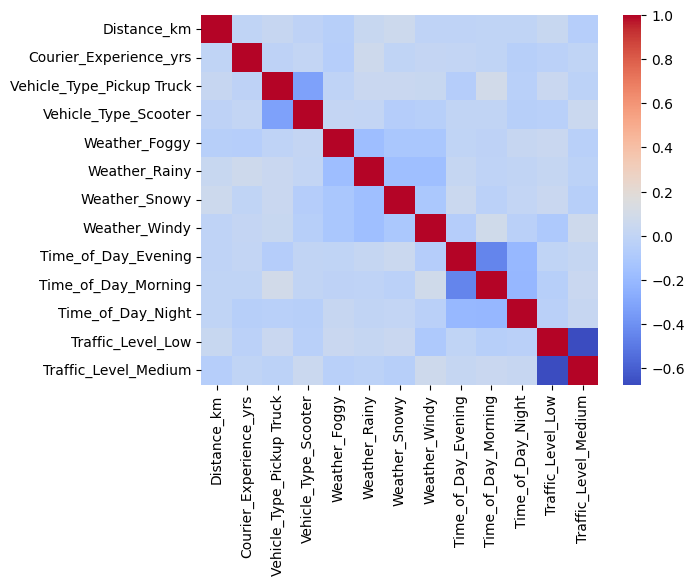

In [32]:
import seaborn as sns

sns.heatmap(X_train.corr(), cmap='coolwarm' )

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

n_estimators=[1000]
min_samples_split=[2]
max_features=[7]
max_depth=[None]

models = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_jobs=-1),
    'GradientBoostRegressor': GradientBoostingRegressor()
}

# Define parameter grids
param_grids = {
    'RandomForest': {
        'n_estimators': [1000],
        'min_samples_split': [2],
        'max_features': [7],
        'max_depth': [None]
    },
    'XGBoost': {
        'n_estimators': [500, 700],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1],
        'colsample_bytree': [0.7, 1]
    },
    'GradientBoostRegressor': {
        'n_estimators':[1000, 500],
        'min_samples_split': [2, 8, 15],
        'criterion': ['friedman_mse', 'squared_error'],
        'loss': ['squared_error', 'huber'],
        'max_depth': [5, 8, 15, None, 10]

    }
}



best_estimators = {}
for name in models:
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        verbose=3,
        n_jobs=-1,
        cv=3,
        scoring='r2'
    )
    grid.fit(X_train_imputed, y_train)
    best_estimators[name] = grid.best_estimator_
    print(f"Best {name} model: {grid.best_params_}")



Running GridSearchCV for RandomForest...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best RandomForest model: {'max_depth': None, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 1000}
Running GridSearchCV for XGBoost...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best XGBoost model: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Running GridSearchCV for GradientBoostRegressor...
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best GradientBoostRegressor model: {'criterion': 'friedman_mse', 'loss': 'absolute_error', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, model in best_estimators.items():
    y_pred = model.predict(X_test_imputed)

    print(f"--- {name} Evaluation ---")
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))
    print()


--- RandomForest Evaluation ---
Mean Squared Error:  121.4925665525
Mean Absolute Error:  6.662925
R2 Score:  0.7086260269777245

--- XGBoost Evaluation ---
Mean Squared Error:  98.27722930908203
Mean Absolute Error:  5.913022041320801
R2 Score:  0.7643030881881714

--- GradientBoostRegressor Evaluation ---
Mean Squared Error:  109.78490568220408
Mean Absolute Error:  6.142101647332433
R2 Score:  0.7367043511038465



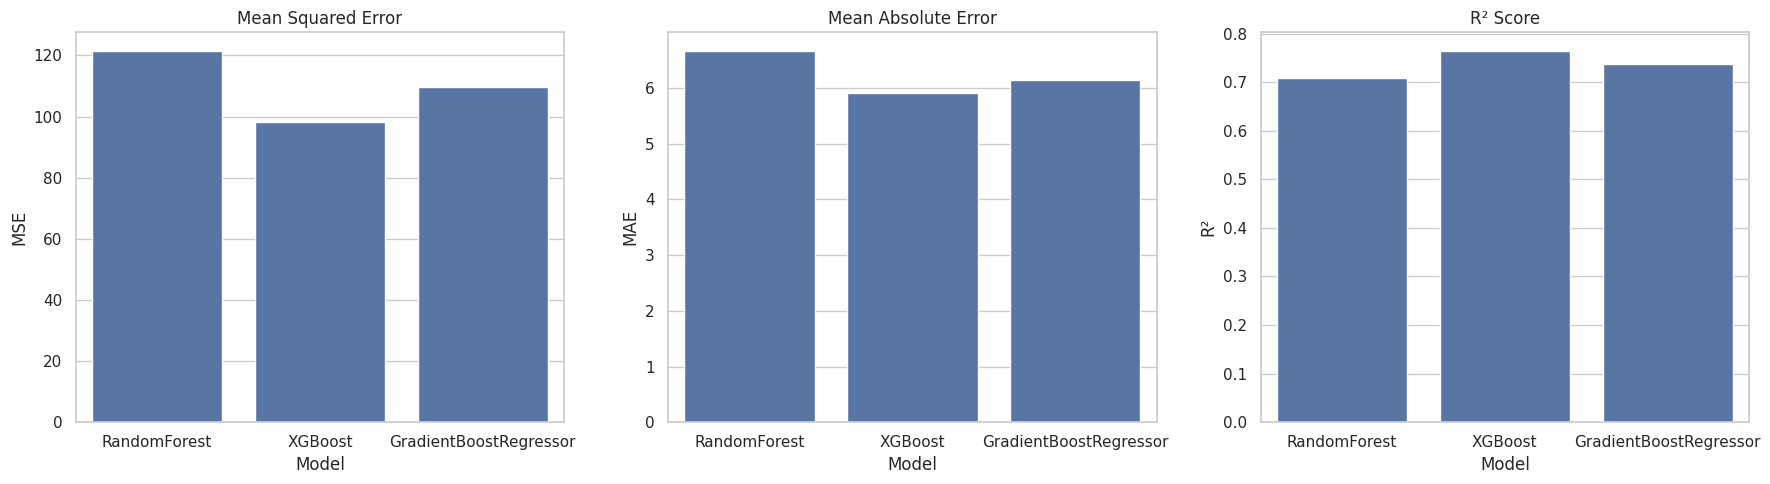

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Collect metrics
metrics = {'Model': [], 'MSE': [], 'MAE': [], 'R2': []}

for name, model in best_estimators.items():
    y_pred = model.predict(X_test_imputed)

    metrics['Model'].append(name)
    metrics['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics['MAE'].append(mean_absolute_error(y_test, y_pred))
    metrics['R2'].append(r2_score(y_test, y_pred))

# Convert to DataFrame for easier plotting
import pandas as pd
df_metrics = pd.DataFrame(metrics)

# Set style
sns.set(style="whitegrid")

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x='Model', y='MSE', data=df_metrics, ax=axes[0])
axes[0].set_title('Mean Squared Error')
axes[0].set_ylabel('MSE')

sns.barplot(x='Model', y='MAE', data=df_metrics, ax=axes[1])
axes[1].set_title('Mean Absolute Error')
axes[1].set_ylabel('MAE')

sns.barplot(x='Model', y='R2', data=df_metrics, ax=axes[2])
axes[2].set_title('R² Score')
axes[2].set_ylabel('R²')

plt.tight_layout()
plt.show()


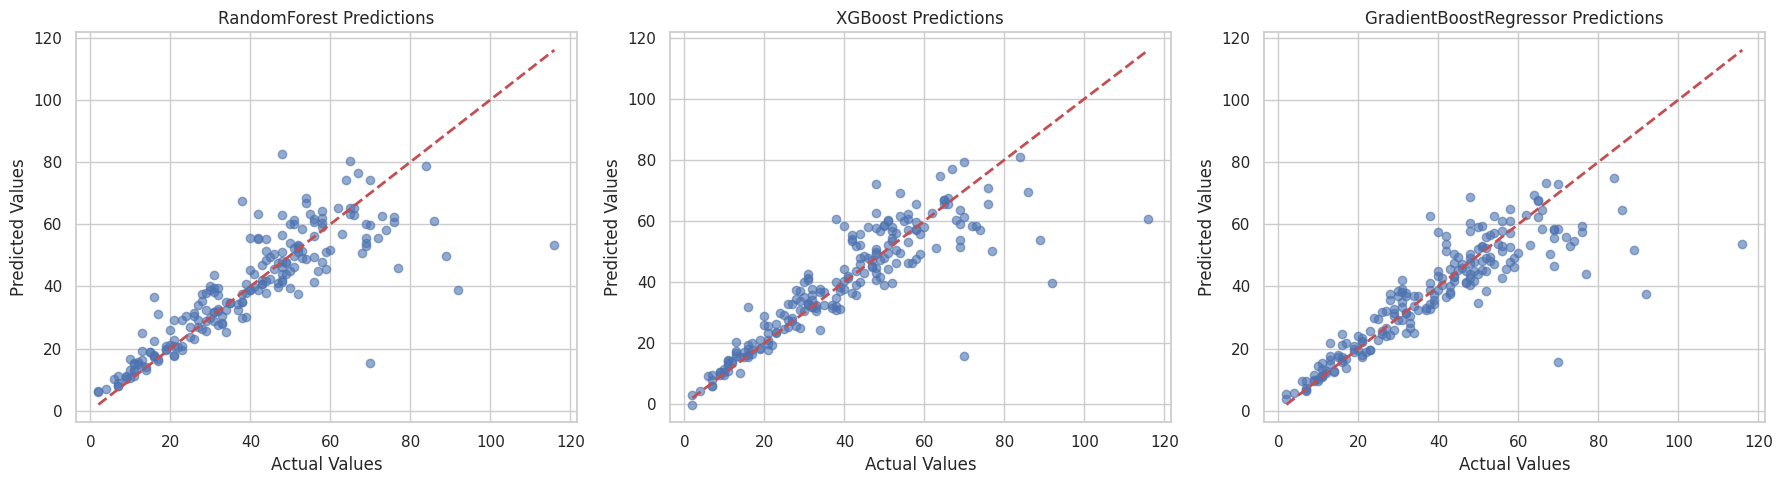

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")  # valid Seaborn style

# Create subplots for each model
num_models = len(best_estimators)
fig, axes = plt.subplots(1, num_models, figsize=(6*num_models, 5))

if num_models == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, (name, model) in zip(axes, best_estimators.items()):
    y_pred = model.predict(X_test_imputed)

    ax.scatter(y_test, y_pred, alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Perfect prediction line
    ax.set_title(f'{name} Predictions')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


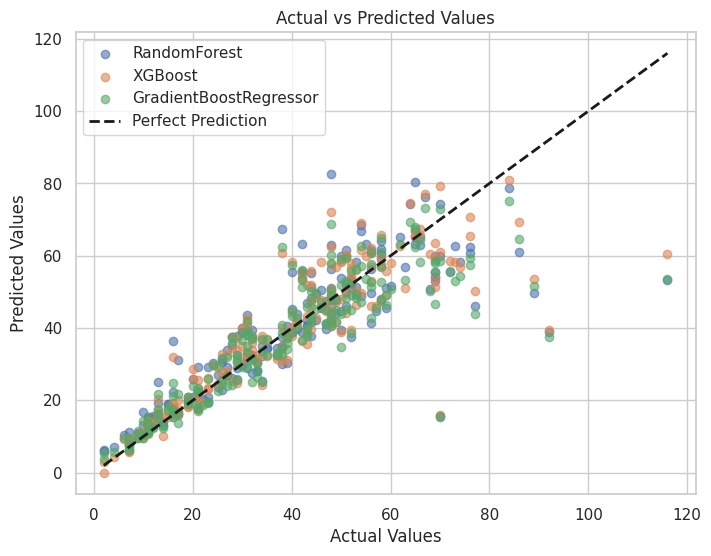

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Plot each model's predictions vs actual
plt.figure(figsize=(8,6))

for name, model in best_estimators.items():
    y_pred = model.predict(X_test_imputed)
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()



In [53]:
X_train_imputed.head()

,Distance_km,Courier_Experience_yrs,Vehicle_Type_Pickup Truck,Vehicle_Type_Scooter,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Level_Low,Traffic_Level_Medium
0,3.54,5.0,0.0,0.0,0.0,1.00,0.0,0.0,1.00,0.0,0.0,0.0,1.0
1,16.54,7.0,0.0,0.0,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.0,1.0
2,8.67,4.0,0.0,0.0,0.0,0.00,0.0,1.0,0.00,1.0,0.0,0.0,0.0
3,19.74,7.0,1.0,0.0,0.0,0.79,0.0,0.0,0.63,0.0,0.0,1.0,0.0
4,14.27,3.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,1.0,0.0,1.0


# Using Deep Learning

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),


    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),


    Dense(256, activation='relu'),



    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),


    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mae',
    metrics=['mae', 'mse']
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)




Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 35.2550 - mae: 35.0840 - mse: 1685.1888 - val_loss: 30.6024 - val_mae: 30.4270 - val_mse: 1330.0658
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.6307 - mae: 11.4558 - mse: 225.2116 - val_loss: 32.0504 - val_mae: 31.8768 - val_mse: 1368.1504
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5972 - mae: 8.4243 - mse: 154.5622 - val_loss: 31.9251 - val_mae: 31.7539 - val_mse: 1376.3289
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3173 - mae: 8.1468 - mse: 150.8608 - val_loss: 31.0404 - val_mae: 30.8715 - val_mse: 1296.3118
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6444 - mae: 7.4762 - mse: 146.6527 - val_loss: 30.1664 - val_mae: 29.9998 - val_mse: 1243.0023
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8281 - mae: 6.6623 - mse: 104.6860 - val_loss: 29.5226 - val_mae: 29.3586 - val_mse: 1189.4812
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss:

In [108]:
from sklearn.metrics import r2_score
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {test_mae}, Test MSE: {test_mse}")

y_pred = model.predict(X_test_scaled)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("F1 Score ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 7.9356 - mae: 7.8583 - mse: 155.3378
Test MAE: 7.7611308097839355, Test MSE: 139.07203674316406
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Mean Squared Error:  139.07203674316406
F1 Score  0.6664654016494751
Mean Absolute Error:  7.7611308097839355
